In [109]:
URL = "https://data.insideairbnb.com/australia/vic/melbourne/2024-09-05/visualisations/listings.csv"

import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# Fetch the data from the URL
response = requests.get(URL)
response.raise_for_status()  # Ensure we notice bad responses

# Save the content to a CSV file
with open('listings.csv', 'wb') as f:
    f.write(response.content)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('listings.csv')
print(df.head())

      id                                    name  host_id     host_name  \
0  10803  Room in Deco Apartment, Brunswick East    38901       Lindsay   
1  12936  St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC    50121  The A2C Team   
2  38271         Berwick- Old Trafford Apartment   164193   Daryl & Dee   
3  41836       CLOSE TO CITY & MELBOURNE AIRPORT   182833         Diana   
4  43414                        Home In The City   189682       Belinda   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN      Moreland -37.76606  144.97951     Private room   
1                  NaN  Port Phillip -37.85999  144.97662  Entire home/apt   
2                  NaN         Casey -38.05723  145.33982  Entire home/apt   
3                  NaN       Darebin -37.69761  145.00066     Private room   
4                  NaN     Melbourne -37.81094  144.98487  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0 

In [111]:
import geopandas as gpd

In [112]:
SAL = gpd.read_file("../../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")
SAL = SAL[SAL.STE_NAME21 == "Victoria"]

In [113]:
# make geopandas off lat and lng from listings
df['geometry'] = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [114]:
# merge
gdf = gpd.sjoin(gdf, SAL, how="inner", predicate='within')

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_71503/63521511.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:7844

  gdf = gpd.sjoin(gdf, SAL, how="inner", predicate='within')


In [115]:
# concat and get counts
counts = gdf.groupby('SAL_CODE21').size().reset_index(name='counts')
SAL_counts = SAL.merge(counts, left_on='SAL_CODE21', right_on='SAL_CODE21', how='left')

# make null values 0
SAL_counts['counts'] = SAL_counts['counts'].fillna(0)

In [116]:
SAL_counts[['SAL_CODE21', 'counts']].to_csv('../../data/curated/airbnb_counts.csv', index=False)

<Axes: >

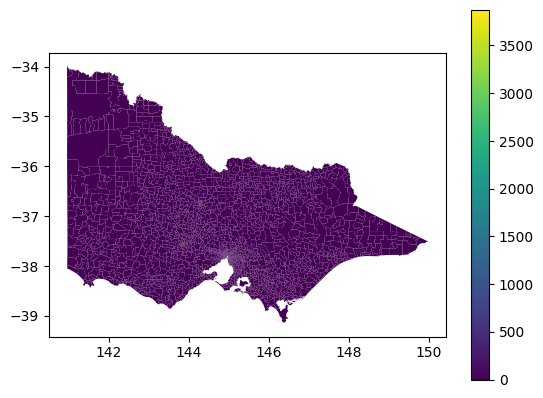

In [117]:
# graph gdf
SAL_counts.plot(column='counts', legend=True)
